# Step 2: Data Preparation
## A. Data Quality Check

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/Users/christinadarsi/Downloads/AMZN_minute_data_with_financials_and_closes.csv')

# Display the first few rows of the dataframe
print(df.head())


                   timestamp    close     high      low  trade_count     open  \
0  2023-07-11 13:30:00+00:00  127.695  128.015  127.580         88.0  127.715   
1  2023-07-11 13:31:00+00:00  127.630  127.630  127.440         54.0  127.600   
2  2023-07-11 13:32:00+00:00  127.595  127.720  127.485         74.0  127.650   
3  2023-07-11 13:33:00+00:00  127.700  127.720  127.570         70.0  127.620   
4  2023-07-11 13:34:00+00:00  128.080  128.150  127.700         36.0  127.700   

    volume        vwap  SMA_10     SMA_2  ...    Net_Income  Gross_Profit  \
0  10325.0  127.690113     NaN       NaN  ...  3.042500e+10  9.380500e+10   
1   7097.0  127.566864     NaN  127.6625  ...  3.042500e+10  9.380500e+10   
2   8645.0  127.605890     NaN  127.6125  ...  3.042500e+10  9.380500e+10   
3  15036.0  127.623712     NaN  127.6475  ...  3.042500e+10  9.380500e+10   
4   3903.0  128.023031     NaN  127.8900  ...  3.042500e+10  9.380500e+10   

     Total_Debt  Operating_Cash_Flow     AAPL     

## 1. list of all the variables along with the following information for each variable of the data
### a. Description/information of the variable

In [2]:

print(df.describe(include='all'))



                        timestamp         close          high           low  \
count                      101871  98687.000000  98687.000000  98687.000000   
unique                      98506           NaN           NaN           NaN   
top     2023-10-09 16:23:00+00:00           NaN           NaN           NaN   
freq                            2           NaN           NaN           NaN   
mean                          NaN    157.399053    157.444401    157.353746   
std                           NaN     22.204203     22.203435     22.204723   
min                           NaN    118.430000    118.480000    118.390000   
25%                           NaN    137.090000    137.130000    137.040000   
50%                           NaN    153.340000    153.370000    153.310000   
75%                           NaN    179.200000    179.240000    179.155000   
max                           NaN    200.990000    201.160000    200.865000   

         trade_count          open         volume  

### b. Data type of the variable

In [3]:
# Creating a summary of each variable with its description and data type
variables_info = pd.DataFrame({
    'Variable Name': df.columns,
    'Data Type': df.dtypes,
})

print("\nSummary of variables:")
print(variables_info)


Summary of variables:
            Variable Name Data Type
timestamp       timestamp    object
close               close   float64
high                 high   float64
low                   low   float64
trade_count   trade_count   float64
...                   ...       ...
MSFT                 MSFT   float64
GOOGL               GOOGL   float64
META                 META   float64
WMT                   WMT   float64
BABA                 BABA   float64

[219 rows x 2 columns]


### c. Sample values from the variable (at least 5 for each variable)

In [4]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
                   timestamp    close     high      low  trade_count     open  \
0  2023-07-11 13:30:00+00:00  127.695  128.015  127.580         88.0  127.715   
1  2023-07-11 13:31:00+00:00  127.630  127.630  127.440         54.0  127.600   
2  2023-07-11 13:32:00+00:00  127.595  127.720  127.485         74.0  127.650   
3  2023-07-11 13:33:00+00:00  127.700  127.720  127.570         70.0  127.620   
4  2023-07-11 13:34:00+00:00  128.080  128.150  127.700         36.0  127.700   

    volume        vwap  SMA_10     SMA_2  ...    Net_Income  Gross_Profit  \
0  10325.0  127.690113     NaN       NaN  ...  3.042500e+10  9.380500e+10   
1   7097.0  127.566864     NaN  127.6625  ...  3.042500e+10  9.380500e+10   
2   8645.0  127.605890     NaN  127.6125  ...  3.042500e+10  9.380500e+10   
3  15036.0  127.623712     NaN  127.6475  ...  3.042500e+10  9.380500e+10   
4   3903.0  128.023031     NaN  127.8900  ...  3.042500e+10  9.380500e+10   

     Total_Debt  Op

## 2. For Numeric variables:
### a. Number of observations in the variable

In [5]:
# Filter numeric variables and provide the number of observations
numeric_variables_info = variables_info[variables_info['Data Type'].apply(lambda x: pd.api.types.is_numeric_dtype(x))]
numeric_variables_info['Number of Observations'] = df[numeric_variables_info['Variable Name']].count()

print("\nNumeric variables information:")
print(numeric_variables_info)


Numeric variables information:
            Variable Name Data Type  Number of Observations
close               close   float64                   98687
high                 high   float64                   98687
low                   low   float64                   98687
trade_count   trade_count   float64                   98687
open                 open   float64                   98687
...                   ...       ...                     ...
MSFT                 MSFT   float64                   88803
GOOGL               GOOGL   float64                   96061
META                 META   float64                   86790
WMT                   WMT   float64                   78672
BABA                 BABA   float64                   83706

[218 rows x 3 columns]


/var/folders/jf/1f_l1yn95h3dy9djz69k1bx80000gn/T/ipykernel_39374/1156365537.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_variables_info['Number of Observations'] = df[numeric_variables_info['Variable Name']].count()


### b. Range of the variable


In [6]:
numeric_variables_info['Range'] = df[numeric_variables_info['Variable Name']].apply(lambda x: x.max() - x.min())

print("\nNumeric variables information:")
print(numeric_variables_info)


Numeric variables information:
            Variable Name Data Type  Number of Observations     Range
close               close   float64                   98687    82.560
high                 high   float64                   98687    82.680
low                   low   float64                   98687    82.475
trade_count   trade_count   float64                   98687  1225.000
open                 open   float64                   98687    82.715
...                   ...       ...                     ...       ...
MSFT                 MSFT   float64                   88803   158.640
GOOGL               GOOGL   float64                   96061    75.530
META                 META   float64                   86790   265.725
WMT                   WMT   float64                   78672   122.710
BABA                 BABA   float64                   83706    35.585

[218 rows x 4 columns]


/var/folders/jf/1f_l1yn95h3dy9djz69k1bx80000gn/T/ipykernel_39374/4042041574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_variables_info['Range'] = df[numeric_variables_info['Variable Name']].apply(lambda x: x.max() - x.min())


### c. Min and max of the variable


In [7]:
numeric_variables_info['Min'] = df[numeric_variables_info['Variable Name']].min()
numeric_variables_info['Max'] = df[numeric_variables_info['Variable Name']].max()
print("\nNumeric variables information:")
print(numeric_variables_info)


Numeric variables information:
            Variable Name Data Type  Number of Observations     Range  \
close               close   float64                   98687    82.560   
high                 high   float64                   98687    82.680   
low                   low   float64                   98687    82.475   
trade_count   trade_count   float64                   98687  1225.000   
open                 open   float64                   98687    82.715   
...                   ...       ...                     ...       ...   
MSFT                 MSFT   float64                   88803   158.640   
GOOGL               GOOGL   float64                   96061    75.530   
META                 META   float64                   86790   265.725   
WMT                   WMT   float64                   78672   122.710   
BABA                 BABA   float64                   83706    35.585   

                 Min       Max  
close        118.430   200.990  
high         118.480   20

/var/folders/jf/1f_l1yn95h3dy9djz69k1bx80000gn/T/ipykernel_39374/576046052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_variables_info['Min'] = df[numeric_variables_info['Variable Name']].min()
/var/folders/jf/1f_l1yn95h3dy9djz69k1bx80000gn/T/ipykernel_39374/576046052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_variables_info['Max'] = df[numeric_variables_info['Variable Name']].max()


### d. Mean, standard deviation/variance of the variable

In [8]:
numeric_variables_info['Mean'] = df[numeric_variables_info['Variable Name']].mean()
numeric_variables_info['Standard Deviation'] = df[numeric_variables_info['Variable Name']].std()
numeric_variables_info['Variance'] = df[numeric_variables_info['Variable Name']].var()

print("\nNumeric variables information:")
print(numeric_variables_info)



Numeric variables information:
            Variable Name Data Type  Number of Observations     Range  \
close               close   float64                   98687    82.560   
high                 high   float64                   98687    82.680   
low                   low   float64                   98687    82.475   
trade_count   trade_count   float64                   98687  1225.000   
open                 open   float64                   98687    82.715   
...                   ...       ...                     ...       ...   
MSFT                 MSFT   float64                   88803   158.640   
GOOGL               GOOGL   float64                   96061    75.530   
META                 META   float64                   86790   265.725   
WMT                   WMT   float64                   78672   122.710   
BABA                 BABA   float64                   83706    35.585   

                 Min       Max        Mean  Standard Deviation     Variance  
close        

/var/folders/jf/1f_l1yn95h3dy9djz69k1bx80000gn/T/ipykernel_39374/3097643136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_variables_info['Mean'] = df[numeric_variables_info['Variable Name']].mean()
/var/folders/jf/1f_l1yn95h3dy9djz69k1bx80000gn/T/ipykernel_39374/3097643136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_variables_info['Standard Deviation'] = df[numeric_variables_info['Variable Name']].std()
/var/folders/jf/1f_l1yn95h3dy9djz69k1bx80000gn/T/ipykernel_39374/3097643136

### e. Mode, median, quartiles (25%, 50%, 75%, 95%) 

In [9]:
# Calculate mode, median, and quartiles (25%, 50%, 75%, 95%)
numeric_variables_info['Mode'] = df[numeric_variables_info['Variable Name']].mode().iloc[0]
numeric_variables_info['Median'] = df[numeric_variables_info['Variable Name']].median()
numeric_variables_info['25th Percentile'] = df[numeric_variables_info['Variable Name']].quantile(0.25)
numeric_variables_info['50th Percentile (Median)'] = df[numeric_variables_info['Variable Name']].quantile(0.50)
numeric_variables_info['75th Percentile'] = df[numeric_variables_info['Variable Name']].quantile(0.75)
numeric_variables_info['95th Percentile'] = df[numeric_variables_info['Variable Name']].quantile(0.95)

print("\nNumeric variables information:")
print(numeric_variables_info)

/var/folders/jf/1f_l1yn95h3dy9djz69k1bx80000gn/T/ipykernel_39374/826439052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_variables_info['Mode'] = df[numeric_variables_info['Variable Name']].mode().iloc[0]
/var/folders/jf/1f_l1yn95h3dy9djz69k1bx80000gn/T/ipykernel_39374/826439052.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_variables_info['Median'] = df[numeric_variables_info['Variable Name']].median()
/var/folders/jf/1f_l1yn95h3dy9djz69k1bx80000gn/T/ipykernel_39374/826439052.py:


Numeric variables information:
            Variable Name Data Type  Number of Observations     Range  \
close               close   float64                   98687    82.560   
high                 high   float64                   98687    82.680   
low                   low   float64                   98687    82.475   
trade_count   trade_count   float64                   98687  1225.000   
open                 open   float64                   98687    82.715   
...                   ...       ...                     ...       ...   
MSFT                 MSFT   float64                   88803   158.640   
GOOGL               GOOGL   float64                   96061    75.530   
META                 META   float64                   86790   265.725   
WMT                   WMT   float64                   78672   122.710   
BABA                 BABA   float64                   83706    35.585   

                 Min       Max        Mean  Standard Deviation     Variance  \
close       

/var/folders/jf/1f_l1yn95h3dy9djz69k1bx80000gn/T/ipykernel_39374/826439052.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_variables_info['95th Percentile'] = df[numeric_variables_info['Variable Name']].quantile(0.95)


### f. Histogram of the variable

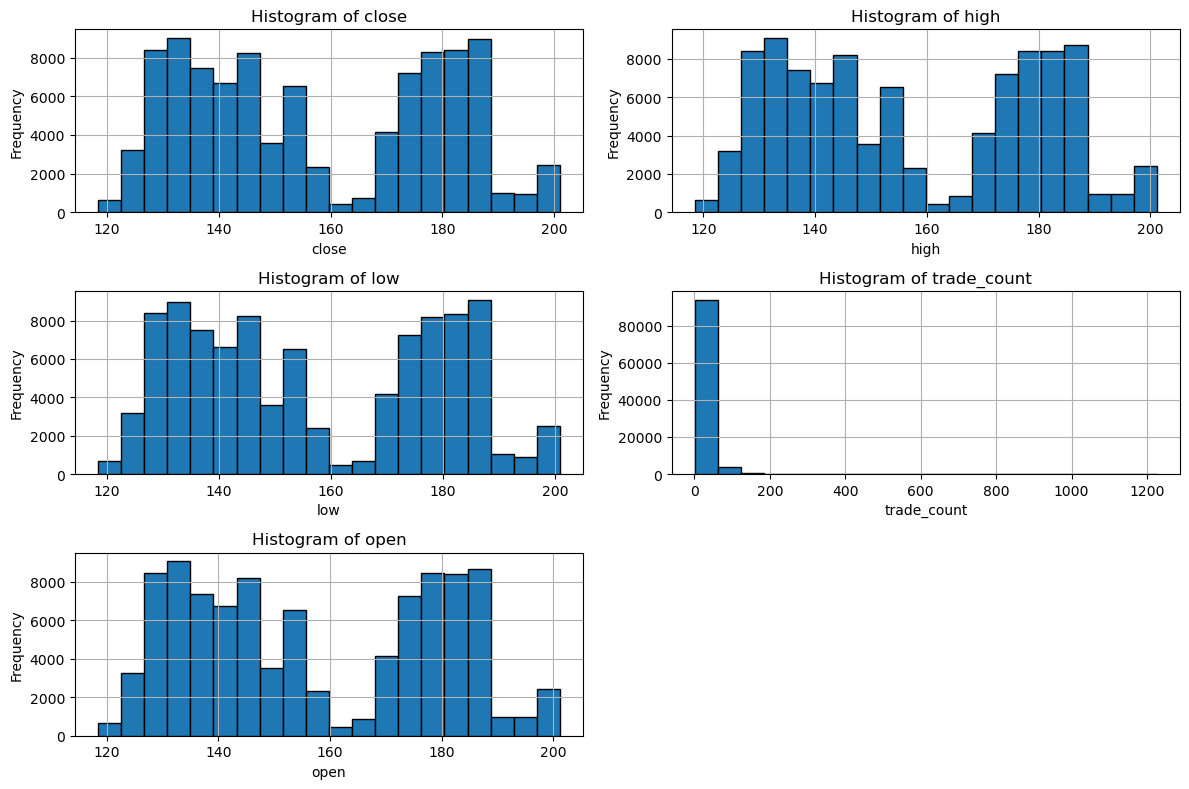

In [10]:
import matplotlib.pyplot as plt

# Selecting any 5 numeric variables for histograms (adjust as needed)
numeric_variables = df.select_dtypes(include='number').columns[:5]

# Plotting histograms for selected numeric variables
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_variables):
    plt.subplot(3, 2, i + 1)
    plt.hist(df[col].dropna(), bins=20, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


#### g. Provide your findings based on the above statistics (explain if there is something interesting you found)???

## 3. For Character/categorical variables:

### a. Frequency table for each variable including the category/value, number of observation(as frequency), percent frequency, cumulative frequency, cumulative percent frequency

In [11]:
# Get categorical variables
categorical_variables = df.select_dtypes(include=['object']).columns.tolist()

print("\nCategorical Variables:")
print(categorical_variables)
# Selecting only character/categorical variables
categorical_variables = df.select_dtypes(include='object').columns

# Creating an empty DataFrame to store frequency table
frequency_table = pd.DataFrame()

# Generate frequency table for each categorical variable
for col in categorical_variables:
    freq_table = df[col].value_counts().reset_index()
    freq_table.columns = [col, 'Frequency']
    freq_table['Percent Frequency'] = freq_table['Frequency'] / len(df) * 100
    freq_table['Cumulative Frequency'] = freq_table['Frequency'].cumsum()
    freq_table['Cumulative Percent Frequency'] = freq_table['Percent Frequency'].cumsum()
    freq_table = freq_table.sort_values(by=col).reset_index(drop=True)
    frequency_table = pd.concat([frequency_table, freq_table], axis=1)

# Displaying the frequency table with variable names
variable_names = pd.DataFrame({'Variable Name': categorical_variables})
frequency_table = pd.concat([variable_names, frequency_table], axis=1)

print("\nFrequency Table for Categorical Variables:")
print(frequency_table)


Categorical Variables:
['timestamp']

Frequency Table for Categorical Variables:
      Variable Name                  timestamp  Frequency  Percent Frequency  \
0         timestamp  2023-07-11 13:30:00+00:00          1           0.000982   
1               NaN  2023-07-11 13:31:00+00:00          1           0.000982   
2               NaN  2023-07-11 13:32:00+00:00          1           0.000982   
3               NaN  2023-07-11 13:33:00+00:00          1           0.000982   
4               NaN  2023-07-11 13:34:00+00:00          1           0.000982   
...             ...                        ...        ...                ...   
98501           NaN  2024-07-09 19:56:00+00:00          1           0.000982   
98502           NaN  2024-07-09 19:57:00+00:00          1           0.000982   
98503           NaN  2024-07-09 19:58:00+00:00          1           0.000982   
98504           NaN  2024-07-09 19:59:00+00:00          1           0.000982   
98505           NaN  2024-07-10 12:31:

### b. Mode (highest freq) and lowest frequency for each variable

In [12]:
# Creating empty lists to store results
modes = []
lowest_frequencies = []

# Calculate mode (highest frequency) and lowest frequency for each categorical variable
for col in categorical_variables:
    value_counts = df[col].value_counts()
    mode_value = value_counts.idxmax()  # mode (highest frequency value)
    lowest_frequency = value_counts.min()  # lowest frequency
    
    modes.append(mode_value)
    lowest_frequencies.append(lowest_frequency)

# Creating a summary DataFrame
mode_lowest_freq_summary = pd.DataFrame({
    'Variable Name': categorical_variables,
    'Mode (Highest Frequency)': modes,
    'Lowest Frequency': lowest_frequencies
})

# Displaying the summary
print("\nMode (Highest Frequency) and Lowest Frequency for Categorical Variables:")
print(mode_lowest_freq_summary)





Mode (Highest Frequency) and Lowest Frequency for Categorical Variables:
  Variable Name   Mode (Highest Frequency)  Lowest Frequency
0     timestamp  2023-10-09 16:23:00+00:00                 1


### c. Bar charts of each variable 

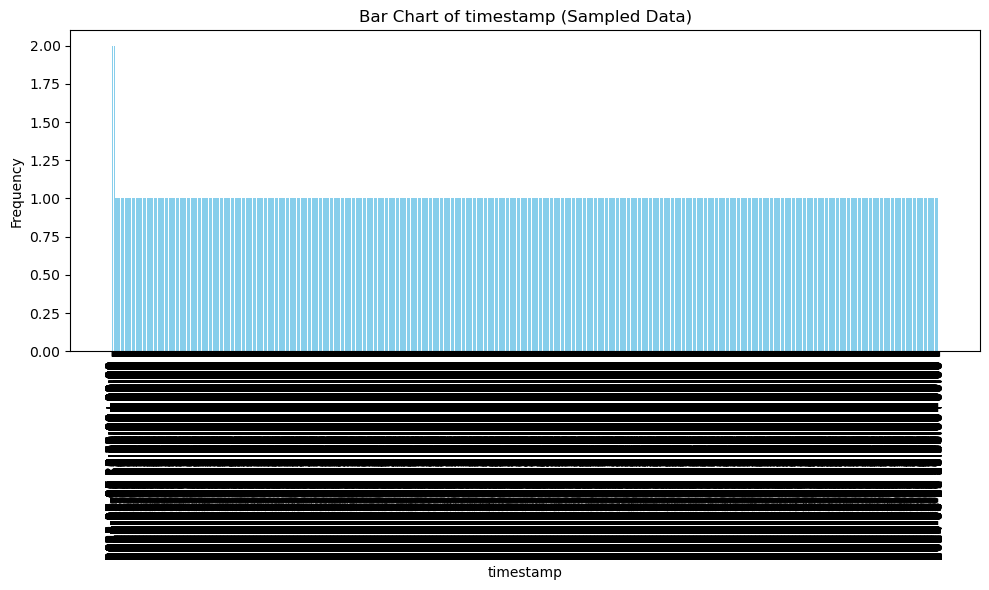

In [13]:

df_sample = df.sample(frac=0.10, random_state=42)  # Adjust the fraction as needed (0.1 for 10% sample)
#visualization for 'timestamp' variable from the sampled data
var = 'timestamp'
freq_table = df_sample[var].value_counts().reset_index()
freq_table.columns = ['Category', 'Frequency']


# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(freq_table['Category'], freq_table['Frequency'], color='skyblue')
plt.xlabel(var)
plt.ylabel('Frequency')
plt.title(f'Bar Chart of {var} (Sampled Data)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### d. findings based on the results above 

## B. Data Cleaning

## 1. Detect and handle outliers
Typically, outliers are defined as values that are outside 1.5 times the interquartile range (IQR) below the first quartile or above the third quartile.
Replace outliers with the median or mean of the variable, or remove them if they represent data errors.

In [14]:
import numpy as np
 
# Function to handle outliers using the IQR method
def handle_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    series = series.mask((series < lower_bound) | (series > upper_bound), series.median())
    return series

# Apply function to numeric columns with outliers
numeric_columns = df.select_dtypes(include=np.number).columns
df[numeric_columns] = df[numeric_columns].apply(handle_outliers)

print("Outliers handled.")


Outliers handled.


### 2. Detect and Handle Noise

using a simple smoothing technique like a rolling mean


In [15]:
# Using a rolling mean to smooth data (example with window size of 3)
df[numeric_columns] = df[numeric_columns].rolling(window=3).mean()

print("Noise handled.")


Noise handled.


### 3. Handle/Treat Missing Values

Missing values above a certain threshold (e.g., 5%) may require imputation.
Impute missing values with mean, median, mode, or using advanced imputation methods based on data characteristics.

In [16]:
# Check for missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data[missing_data['Missing Values'] > 0])

# Filter out columns with excessive missing values
threshold = 0.75  # Adjust this threshold as needed
df = df.loc[:, df.isnull().mean() < threshold]

# Ensure numeric columns are still correctly identified after filtering
numeric_columns = df.select_dtypes(include=np.number).columns

# Impute missing values with the mean for numeric columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

print("Missing values handled.")



                  Missing Values  Percentage
TD_SEQ_DN                 101871  100.000000
TD_SEQ_UP                 101871  100.000000
PSARs_0.02_0.2             63449   62.283672
PSARl_0.02_0.2             61292   60.166289
QQEs_14_5_4.236            60747   59.631298
...                          ...         ...
close                       7818    7.674412
STC_10_12_26_0.5            7818    7.674412
SQZPRO_NO                   7818    7.674412
SQZPRO_OFF                  7818    7.674412
AAPL                        4888    4.798225

[218 rows x 2 columns]
Missing values handled.


### 4. Handle duplicate values in your data
Remove duplicate rows.



In [17]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

print("Duplicate values handled.")


Duplicate values handled.


### 5. Identify any inconsistencies or integrity violations in the data

### 6. Identify and handle highly correlated variables by performing correlation tests on all the numeric variables

In [18]:
import numpy as np
# Calculate correlation matrix for numeric columns only
numeric_columns = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numeric_columns].corr().abs()

# Select upper triangle of correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.7
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.7)]

# Drop highly correlated columns
df.drop(columns=to_drop, inplace=True)

print("Highly correlated variables handled.")


Highly correlated variables handled.


In [19]:
# Save the cleaned dataframe to a new CSV file
cleaned_file_path = '/Users/christinadarsi/Downloads/cleaned_AMZN_minute_data.csv'
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned data saved to {cleaned_file_path}")


Cleaned data saved to /Users/christinadarsi/Downloads/cleaned_AMZN_minute_data.csv


## C. Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Load the cleaned dataset
df = pd.read_csv('/Users/christinadarsi/Downloads/cleaned_AMZN_minute_data.csv')

# Set the style of seaborn plots
sns.set(style="whitegrid")
df_sample = df.sample(n=1000)  # Sample 1000 rows from df

plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df_sample['close'], label='AMZN Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.title('Time Series Plot of Amazon (AMZN) Close Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Select numeric variables for correlation analysis
numeric_variables = ['close', 'trade_count', 'Revenue', 'Net_Income', 'Gross_Profit', 'Total_Debt', 'Operating_Cash_Flow']

correlation_matrix = df[numeric_variables].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Selected Financial Indicators')
plt.tight_layout()
plt.show()


In [ ]:
# Histograms
plt.figure(figsize=(12, 8))
for i, var in enumerate(['Revenue', 'Net_Income', 'Gross_Profit', 'Total_Debt', 'Operating_Cash_Flow'], 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[var], kde=True)
    plt.title(f'Histogram of {var}')
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(12, 8))
for i, var in enumerate(['Revenue', 'Net_Income', 'Gross_Profit', 'Total_Debt', 'Operating_Cash_Flow'], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[var])
    plt.title(f'Boxplot of {var}')
plt.tight_layout()
plt.show()


In [ ]:
# Scatterplot Matrix
sns.pairplot(df[['Revenue', 'Net_Income', 'Gross_Profit', 'Total_Debt', 'Operating_Cash_Flow']])
plt.suptitle('Scatterplot Matrix of Financial Metrics', y=1.02)
plt.tight_layout()
plt.show()
